# Системы ОДУ. VIII.11.2

In [350]:
import numpy as np
import matplotlib.pyplot as plt

## Данные

In [351]:
# Уравнение Ван-дер-Поля
def van_der_pol(t, y, e):
    dydt = np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = e * (1 - y[0]**2) * y[1] - y[0]
    return dydt

e = np.exp(1)
y0 = [2, 0]
t = np.linspace(0, 100, 2000)

## Явные методы Рунге-Кутта от 1 до 4 порядка

In [352]:
# Метод Рунге-Кутты 1-го порядка
def runge_kutta_1(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(t[i], y[i], e)
    
    return y

In [353]:
# Метод Рунге-Кутты 2-го порядка
def runge_kutta_2(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i], e)
        k2 = f(t[i] + h, y[i] + h * k1, e)
        y[i+1] = y[i] + h * (k1 + k2) / 2
    
    return y

In [354]:
# Метод Рунге-Кутты 3-го порядка
def runge_kutta_3(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i], e)
        k2 = f(t[i] + h/2, y[i] + h*k1/2, e)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2, e)
        y[i+1] = y[i] + h * (k1 + 4*k2 + k3) / 6
    
    return y

In [355]:
# Метод Рунге-Кутты 4-го порядка
def runge_kutta_4(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i], e)
        k2 = f(t[i] + h/2, y[i] + h*k1/2, e)
        k3 = f(t[i] + h/2, y[i] + h*k2/2, e)
        k4 = f(t[i] + h, y[i] + h*k3, e)
        y[i+1] = y[i] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return y

### Вычисление и визуализация

In [356]:
solution_1 = runge_kutta_1(van_der_pol, y0, t, e)
solution_2 = runge_kutta_2(van_der_pol, y0, t, e)
solution_3 = runge_kutta_3(van_der_pol, y0, t, e)
solution_4 = runge_kutta_4(van_der_pol, y0, t, e)

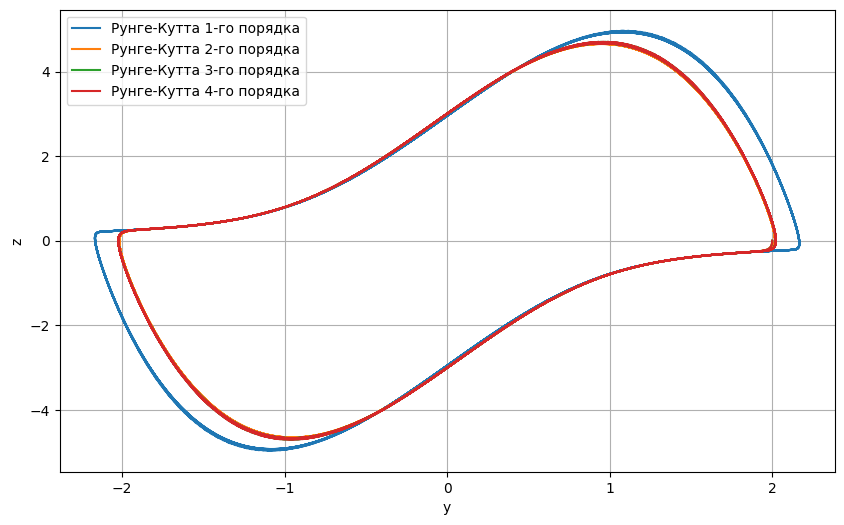

In [357]:
# Визуализация интегральных кривых
plt.figure(figsize=(10, 6))
plt.plot(solution_1[:, 0], solution_1[:, 1], label='Рунге-Кутта 1-го порядка')
plt.plot(solution_2[:, 0], solution_2[:, 1], label='Рунге-Кутта 2-го порядка')
plt.plot(solution_3[:, 0], solution_3[:, 1], label='Рунге-Кутта 3-го порядка')
plt.plot(solution_4[:, 0], solution_4[:, 1], label='Рунге-Кутта 4-го порядка')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()


## Метод Адамса от 2 до 4 порядка

In [358]:

# Метод Адамса 2-го порядка
def adams_2(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью метода Рунге-Кутты 2-го порядка
    y[1] = runge_kutta_2(f, y0, t[:2], e)[1]
    
    # Основной цикл Адамса 2-го порядка
    for i in range(1, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i], e)
        f2 = f(t[i-1], y[i-1], e)
        y[i+1] = y[i] + h * (3*f1 - f2) / 2
    
    return y

In [359]:
# Метод Адамса 3-го порядка
def adams_3(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью метода Рунге-Кутты 3-го порядка
    y[1:3] = runge_kutta_3(f, y0, t[:3], e)[1:3]
    
    # Основной цикл Адамса 3-го порядка
    for i in range(2, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i], e)
        f2 = f(t[i-1], y[i-1], e)
        f3 = f(t[i-2], y[i-2], e)
        y[i+1] = y[i] + h * (23*f1 - 16*f2 + 5*f3) / 12
    
    return y

In [360]:
# Метод Адамса 4-го порядка
def adams_4(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью метода Рунге-Кутты 4-го порядка
    y[1:4] = runge_kutta_4(f, y0, t[:4], e)[1:4]
    
    # Основной цикл Адамса 4-го порядка
    for i in range(3, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i], e)
        f2 = f(t[i-1], y[i-1], e)
        f3 = f(t[i-2], y[i-2], e)
        f4 = f(t[i-3], y[i-3], e)
        y[i+1] = y[i] + h * (55*f1 - 59*f2 + 37*f3 - 9*f4) / 24
    
    return y

### Вычисление и визуализация

In [361]:
solution_adams_2 = adams_2(van_der_pol, y0, t, e)
solution_adams_3 = adams_3(van_der_pol, y0, t, e)
solution_adams_4 = adams_4(van_der_pol, y0, t, e)

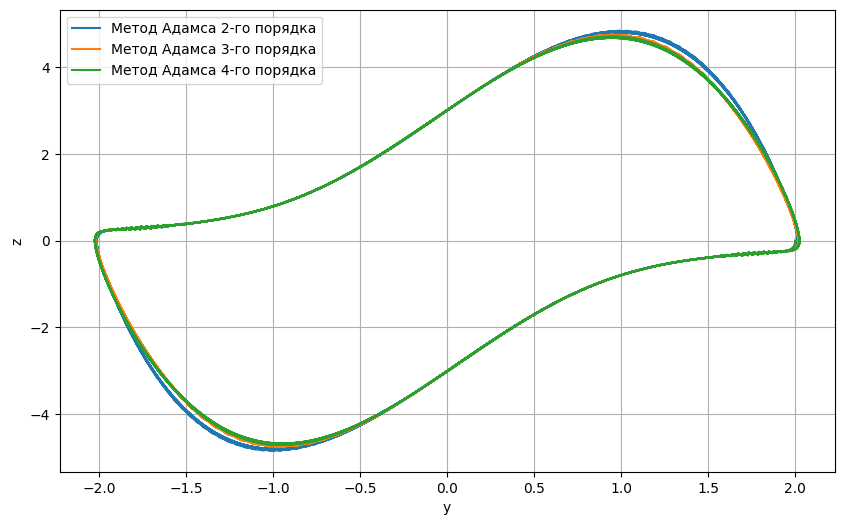

In [362]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(solution_adams_2[:, 0], solution_adams_2[:, 1], label='Метод Адамса 2-го порядка')
plt.plot(solution_adams_3[:, 0], solution_adams_3[:, 1], label='Метод Адамса 3-го порядка')
plt.plot(solution_adams_4[:, 0], solution_adams_4[:, 1], label='Метод Адамса 4-го порядка')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()


# Метод дифференцирования назад от 2 до 4 порядка

In [363]:
t_bdf = np.linspace(0, 100, 2000)

# Метод 2-го порядка
def bdf_2(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью Рунге-Кутты 2-го порядка
    y[1] = runge_kutta_4(f, y0, t[:3], e)[2]
    
    # Основной цикл для BDF 2-го порядка
    for i in range(1, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i], e)
        f2 = f(t[i-1], y[i-1], e)
        y[i+1] = y[i] + h * (3*f1 - f2) / 2
    
    return y

In [ ]:

# Метод 3-го порядка
def bdf_3(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью Рунге-Кутты 3-го порядка
    y[1:3] = runge_kutta_4(f, y0, t[:4], e)[2:4]
    
    # Основной цикл для BDF 3-го порядка
    for i in range(2, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i], e)
        f2 = f(t[i-1], y[i-1], e)
        f3 = f(t[i-2], y[i-2], e)
        y[i+1] = y[i] + h * (23*f1 - 16*f2 + 5*f3) / 12
    
    return y


In [ ]:
# Метод 4-го порядка
def bdf_4(f, y0, t, e):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    # Инициализация с помощью Рунге-Кутты 4-го порядка
    y[1:4] = runge_kutta_4(f, y0, t[:5], e)[2:5]
    
    # Основной цикл для BDF 4-го порядка
    for i in range(3, n-1):
        h = t[i+1] - t[i]
        f1 = f(t[i], y[i], e)
        f2 = f(t[i-1], y[i-1], e)
        f3 = f(t[i-2], y[i-2], e)
        f4 = f(t[i-3], y[i-3], e)
        y[i+1] = y[i] + h * (55*f1 - 59*f2 + 37*f3 - 9*f4) / 24
    
    return y

### Вычисление и визуализация

In [366]:
solution_bdf_2 = bdf_2(van_der_pol, y0, t_bdf, e)
solution_bdf_3 = bdf_3(van_der_pol, y0, t_bdf, e)
solution_bdf_4 = bdf_4(van_der_pol, y0, t_bdf, e)

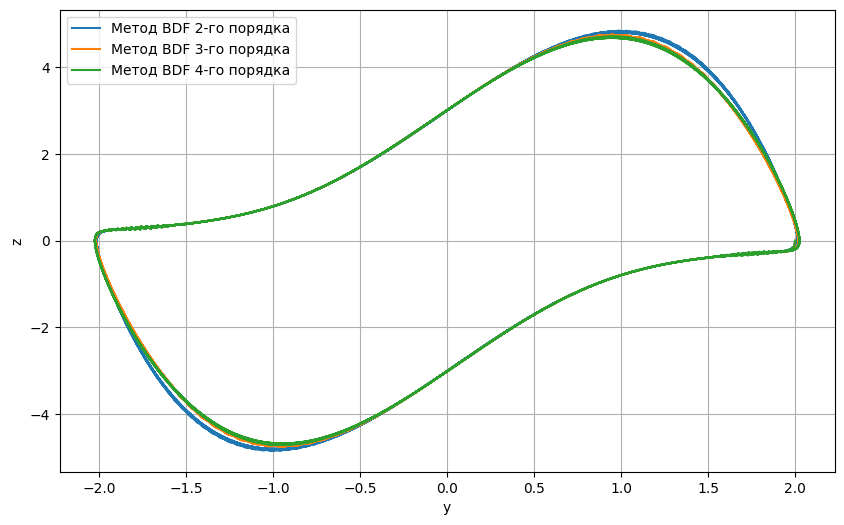

In [367]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(solution_bdf_2[:, 0], solution_bdf_2[:, 1], label='Метод BDF 2-го порядка')
plt.plot(solution_bdf_3[:, 0], solution_bdf_3[:, 1], label='Метод BDF 3-го порядка')
plt.plot(solution_bdf_4[:, 0], solution_bdf_4[:, 1], label='Метод BDF 4-го порядка')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()